<a href="https://colab.research.google.com/github/liveleisurely/Finance/blob/main/LSTM_SAMSUNG_PRICE_EXPECTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [54]:
data = pd.read_csv('/content/005930.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-06,25380.0,25820.0,25360.0,25700.0,22346.593750,9211700.0
1,2016-04-07,26000.0,26000.0,25160.0,25380.0,22068.347656,12939750.0
2,2016-04-08,25380.0,25380.0,24800.0,24920.0,21668.371094,12593400.0
3,2016-04-11,24920.0,25420.0,24920.0,25320.0,22016.177734,6034650.0
4,2016-04-12,25400.0,25620.0,25320.0,25500.0,22172.691406,6702700.0


In [55]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1.221000e+03
mean,48245.888616,48759.328419,47760.515971,48261.113841,44871.079694,1.457529e+07
std,12484.250155,12659.620525,12333.522810,12470.792700,13349.230394,8.469761e+06
min,24920.000000,25240.000000,24800.000000,24900.000000,21650.980469,0.000000e+00
25%,42350.000000,42800.000000,41900.000000,42450.000000,39002.359375,9.185000e+06
50%,47020.000000,47400.000000,46550.000000,47000.000000,43097.230469,1.225550e+07
75%,52600.000000,53200.000000,52000.000000,52640.000000,49013.863281,1.724052e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,91000.000000,9.030618e+07


In [56]:
data.isna().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [57]:
data.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [58]:
data[data["Open"].isnull()== True].head(11)

,Date,Open,High,Low,Close,Adj Close,Volume
395,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
400,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
424,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
637,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
882,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data.dropna(inplace=True)

In [60]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

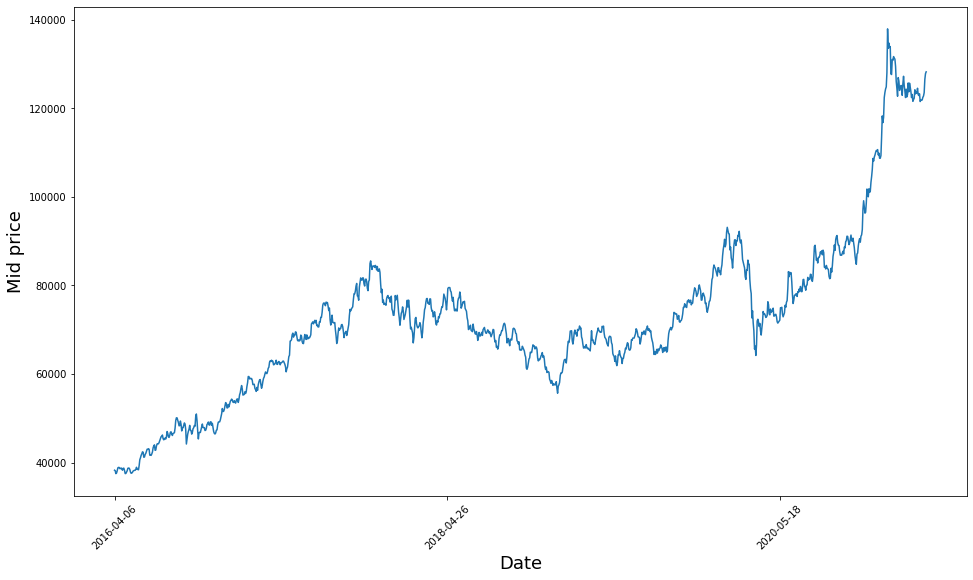

In [61]:
plt.figure(figsize=(16,9))
plt.plot(range(data.shape[0]),data['Low']+data['High']/2.0)
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid price',fontsize=18)
plt.show()

In [62]:
data = data['Open'].values


In [63]:
data = data.reshape(-1,1)

In [64]:
print(data.shape)

(1221, 1)


In [65]:
data[:5]

array([[25380.],
       [26000.],
       [25380.],
       [24920.],
       [25400.]])

In [66]:
dataset_train = np.array(data[:int(data.shape[0]*0.8)])
dataset_test = np.array(data[int(data.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(976, 1)
(295, 1)


In [67]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.01240561],
       [0.02912621],
       [0.01240561],
       [0.        ],
       [0.01294498]])

In [68]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.92179072],
       [0.91370011],
       [0.88673139],
       [0.82470334],
       [0.86785329]])

In [69]:
def create_dataset(df):
    x=[]
    y=[]
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [70]:
x_train, y_train = create_dataset(dataset_train)

In [71]:
x_train[:1]

array([[0.01240561, 0.02912621, 0.01240561, 0.        , 0.01294498,
        0.02912621, 0.03398058, 0.02642934, 0.02588997, 0.01941748,
        0.02912621, 0.02588997, 0.0210356 , 0.0210356 , 0.02588997,
        0.02912621, 0.00755124, 0.00053937, 0.01132686, 0.01402373,
        0.02373247, 0.02858684, 0.02696872, 0.02481122, 0.0188781 ,
        0.00377562, 0.00161812, 0.00970874, 0.01186624, 0.01294498,
        0.01240561, 0.02157497, 0.01995685, 0.02858684, 0.02912621,
        0.02750809, 0.01833873, 0.02804746, 0.05609493, 0.06688242,
        0.07551241, 0.09331176, 0.08737864, 0.09600863, 0.08090615,
        0.06742179, 0.07497303, 0.09007551, 0.08845739, 0.09762675]])

In [72]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.92179072, 0.91370011, 0.88673139, 0.82470334, 0.86785329,
        0.94606257, 0.94875944, 0.97572816, 0.92448759, 0.94066882,
        0.95415318, 0.97842503, 0.97033441, 0.98921251, 0.96763754,
        0.94066882, 0.96494067, 0.91370011, 0.87594391, 0.84358145,
        0.8381877 , 0.84627832, 0.81121899, 0.79234088, 0.8570658 ,
        0.80582524, 0.88133765, 0.85167206, 0.85167206, 0.77885653,
        0.79234088, 0.73300971, 0.60760518, 0.67907228, 0.59277238,
        0.61569579, 0.57928803, 0.51860841, 0.4768069 , 0.5105178 ,
        0.64805825, 0.64940669, 0.66558792, 0.59681769, 0.62243797,
        0.60760518, 0.57389428, 0.60625674, 0.60895361, 0.66693635]])

In [73]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [74]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()





Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50, 96)            74112     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 96)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 96)               

In [75]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [76]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
29/29 [==============================] - 10s 150ms/step - loss: 0.0901
Epoch 2/50
29/29 [==============================] - 4s 149ms/step - loss: 0.0088
Epoch 3/50
29/29 [==============================] - 4s 150ms/step - loss: 0.0065
Epoch 4/50
29/29 [==============================] - 4s 147ms/step - loss: 0.0056
Epoch 5/50
29/29 [==============================] - 4s 149ms/step - loss: 0.0048
Epoch 6/50
29/29 [==============================] - 4s 149ms/step - loss: 0.0050
Epoch 7/50
29/29 [==============================] - 4s 149ms/step - loss: 0.0054
Epoch 8/50
29/29 [==============================] - 4s 150ms/step - loss: 0.0050
Epoch 9/50
29/29 [==============================] - 4s 148ms/step - loss: 0.0048
Epoch 10/50
29/29 [==============================] - 4s 147ms/step - loss: 0.0044
Epoch 11/50
29/29 [==============================] - 4s 150ms/step - loss: 0.0052
Epoch 12/50
29/29 [==============================] - 4s 150ms/step - loss: 0.0051
Epoch 13/50
29/29 [=====

In [77]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

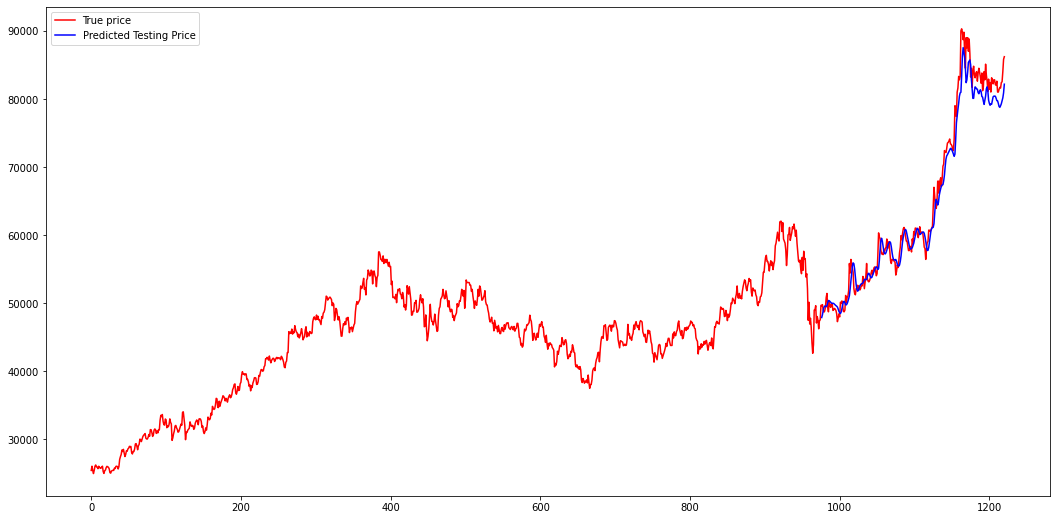

In [78]:
fig, ax = plt.subplots(figsize=(18,9))
plt.plot(data, color='red', label="True price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions,color='blue', label='Predicted Testing Price')
plt.legend()

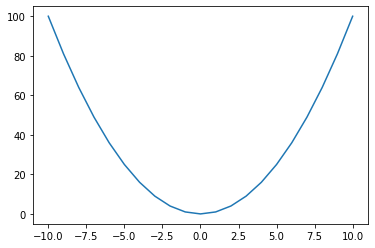

In [84]:
plt.plot(range(-10,11),np.array(range(-10,11))**2)
plt.show()

In [92]:
data

array([[25380.],
       [26000.],
       [25380.],
       ...,
       [84000.],
       [85800.],
       [86200.]])

In [ ]:
data[int(data.shape[0]*0.8)-50:]

In [99]:
x_train[:1]

array([[[0.01240561],
        [0.02912621],
        [0.01240561],
        [0.        ],
        [0.01294498],
        [0.02912621],
        [0.03398058],
        [0.02642934],
        [0.02588997],
        [0.01941748],
        [0.02912621],
        [0.02588997],
        [0.0210356 ],
        [0.0210356 ],
        [0.02588997],
        [0.02912621],
        [0.00755124],
        [0.00053937],
        [0.01132686],
        [0.01402373],
        [0.02373247],
        [0.02858684],
        [0.02696872],
        [0.02481122],
        [0.0188781 ],
        [0.00377562],
        [0.00161812],
        [0.00970874],
        [0.01186624],
        [0.01294498],
        [0.01240561],
        [0.02157497],
        [0.01995685],
        [0.02858684],
        [0.02912621],
        [0.02750809],
        [0.01833873],
        [0.02804746],
        [0.05609493],
        [0.06688242],
        [0.07551241],
        [0.09331176],
        [0.08737864],
        [0.09600863],
        [0.08090615],
        [0